In [19]:
from pycgp.benchmarks.symbolic import X, y, PARAMS, EV_PARAMS
from pycgp.evolution import evolution
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization

In [45]:
def mlp_evaluate(hidden_layer_sizes):
    est = MLPRegressor(max_iter=100000, solver='lbfgs', hidden_layer_sizes=int(hidden_layer_sizes), random_state=0)
    est.fit(X, y)
    return -mean_squared_error(est.predict(X), y)
    

mlpBO = BayesianOptimization(mlp_evaluate, {
    'hidden_layer_sizes': (1, 1000)
}, random_state=0)

In [46]:
%time
mlpBO.maximize(init_points=5, n_iter=10)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs
Initialization
----------------------------------------------------
 Step |   Time |      Value |   hidden_layer_sizes | 
    1 | 00m00s |   -0.19169 |             549.2647 | 
    2 | 00m01s |   -0.16866 |             715.4742 | 
    3 | 00m00s |   -0.19255 |             603.1606 | 
    4 | 00m06s |   -0.13024 |             545.3383 | 
    5 | 00m01s |   -0.16740 |             424.2311 | 
Bayesian Optimization
----------------------------------------------------
 Step |   Time |      Value |   hidden_layer_sizes | 
    6 | 00m01s |   -0.56067 |               1.0033 | 
    7 | 00m04s |   -0.16998 |            1000.0000 | 
    8 | 00m02s |   -0.18999 |             218.8185 | 
    9 | 00m10s |   -0.13191 |             859.9811 | 
   10 | 00m01s |   -0.18042 |             116.1109 | 
   11 | 00m02s |   -0.17704 |             318.8041 | 
   12 | 00m02s |   -0.18216 |             929.5150 | 
   13 | 00m02s |   -0.19198 |        

In [47]:
mlpBO.res['max']

{'max_params': {'hidden_layer_sizes': 545.3382998139},
 'max_val': -0.1302382804803266}

In [48]:
est = MLPRegressor(max_iter=100000, solver='lbfgs', hidden_layer_sizes=545, random_state=0)
est.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=545, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

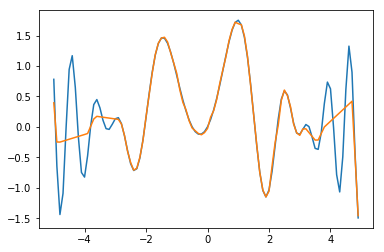

In [50]:
plt.plot(X, y)
plt.plot(X, est.predict(X))

# Hyperparameters for PyCGP

In [53]:
from pycgp.mutation import probabilistic_mutation

def pycgp_evaluate(columns):
    params = deepcopy(PARAMS)
    params['n_cols'] = int(columns)
    ev_params = deepcopy(EV_PARAMS)
    ev_params['max_evaluations'] = 10000
    ev_params['mutation'] = probabilistic_mutation
    
    random.seed(0)
    
    result = evolution(params, ev_params, X, y)
    
    individual = result['final'][0]
    
    return -mean_squared_error(individual.execute(X), y)

pycgpBO = BayesianOptimization(pycgp_evaluate, {
    'columns': (1, 100)
}, random_state=0)

In [54]:
%%time
pycgpBO.maximize(init_points=5, n_iter=10)

Initialization
-----------------------------------------
 Step |   Time |      Value |   columns | 
    1 | 00m30s |   -0.32041 |   55.3325 | 
    2 | 00m38s |   -0.17718 |   71.8037 | 
    3 | 00m35s |   -0.25464 |   60.6736 | 
    4 | 00m35s |   -0.16776 |   54.9434 | 
    5 | 00m30s |   -0.16776 |   42.9418 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |   columns | 
    6 | 00m09s |   -0.60134 |    1.0000 | 
    7 | 00m52s |   -0.33632 |   99.9999 | 
    8 | 00m26s |   -0.00000 |   23.0744 | 
    9 | 00m50s |   -0.12414 |   85.3227 | 
   10 | 00m24s |   -0.16776 |   13.7343 | 
   11 | 00m11s |   -0.00000 |   32.2945 | 
   12 | 00m36s |   -0.20751 |   49.3289 | 
   13 | 01m08s |   -0.17211 |   92.3634 | 
   14 | 01m13s |   -0.17718 |   78.6399 | 


/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


   15 | 00m53s |   -0.25464 |   66.1400 | 
CPU times: user 9min 6s, sys: 3.03 s, total: 9min 9s
Wall time: 9min 39s


In [56]:
EV_PARAMS

{'cost_func': <function sklearn.metrics.regression.mean_squared_error>,
 'target_fitness': 0}